# Making the Most of your Colab Subscription



## Faster GPUs

Users who have purchased one of Colab's paid plans have access to premium GPUs. You can upgrade your notebook's GPU settings in `Runtime > Change runtime type` in the menu to enable Premium accelerator. Subject to availability, selecting a premium GPU may grant you access to a V100 or A100 Nvidia GPU.

The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to `Runtime > Change runtime type` in the menu to enable a GPU accelerator, and then re-execute the code cell.


In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Dec  4 18:45:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
ls

sample_data/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to use a GPU with your notebook, select the `Runtime > Change runtime type` menu, and then set the hardware accelerator dropdown to GPU.

## More memory

Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available.



You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via `Runtime > Change runtime type` in the menu. Then select High-RAM in the Runtime shape dropdown. After, re-execute the code cell.


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


## Longer runtimes

All Colab runtimes are reset after some period of time (which is faster if the runtime isn't executing code). Colab Pro and Pro+ users have access to longer runtimes than those who use Colab free of charge.

## Background execution

Colab Pro+ users have access to background execution, where notebooks will continue executing even after you've closed a browser tab up to 24 hours. To enable background execution on your notebook, in the menu navigate to `Runtime > Change runtime type` and enable Background execution.



## Relaxing resource limits in Colab Pro

Your resources are not unlimited in Colab. To make the most of Colab, avoid using resources when you don't need them. For example, only use a GPU when required and close Colab tabs when finished.



If you encounter limitations, you can relax those limitations by purchasing more compute units via Pay As You Go. Anyone can purchase compute units via [Pay As You Go](https://colab.research.google.com/signup); no subscription is required.

## Send us feedback!

If you have any feedback for us, please let us know. The best way to send feedback is by using the Help > 'Send feedback...' menu. If you encounter usage limits in Colab Pro consider subscribing to Pro+.

If you encounter errors or other issues with billing (payments) for Colab Pro, Pro+, or Pay As You Go, please email [colab-billing@google.com](mailto:colab-billing@google.com).

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

In [3]:
%cd drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [5]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 512 kB 5.1 MB/s 


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from bs4 import BeautifulSoup
import torchvision
from torchvision import transforms, datasets, models
import torch
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
import matplotlib.patches as patches
import os
import torchmetrics
from torchmetrics.detection.mean_ap import MeanAveragePrecision

In [8]:
def generate_box(obj):
    
    xmin = int(obj.find('xmin').text)
    ymin = int(obj.find('ymin').text)
    xmax = int(obj.find('xmax').text)
    ymax = int(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]

def generate_label(obj):
    #有三类：0, 1(with_mask), 2(mask_weared_incorrect)
    if obj.find('name').text == "with_mask":
        return 1
    elif obj.find('name').text == "mask_weared_incorrect":
        return 2
    return 0

def generate_target(image_id, file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, 'xml')
        objects = soup.find_all('object')

        num_objs = len(objects)

        # Bounding boxes for objects
        # In coco format, bbox = [xmin, ymin, width, height]
        # In pytorch, the input should be [xmin, ymin, xmax, ymax]
        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # Labels (In my case, I only one class: target class or background)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        # Tensorise img_id
        img_id = torch.tensor([image_id])
        # Annotation is in dictionary format
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = img_id
        
        return target

In [9]:
imgs = list(sorted(os.listdir("./face_mask_detection/images/")))
labels = list(sorted(os.listdir("./face_mask_detection/annotations/")))

In [10]:
class MaskDataset(object):
    def __init__(self, transforms):
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir("./face_mask_detection/images/")))
        # self.labels = list(sorted(os.listdir("/kaggle/input/face-mask-detection/annotations/")))

    def __getitem__(self, idx):
        # load images ad masks
        file_image = 'maksssksksss'+ str(idx) + '.png'
        file_label = 'maksssksksss'+ str(idx) + '.xml'
        img_path = os.path.join("./face_mask_detection/images/", file_image)
        label_path = os.path.join("./face_mask_detection/annotations/", file_label)
        img = Image.open(img_path).convert("RGB")
        #Generate Label
        target = generate_target(idx, label_path)
        
        if self.transforms is not None:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.imgs)

In [11]:
data_transform = transforms.Compose([
        transforms.ToTensor(), 
    ])

def collate_fn(batch):
    return tuple(zip(*batch))

dataset = MaskDataset(data_transform)
data_loader = torch.utils.data.DataLoader(
  dataset, batch_size=4, collate_fn=collate_fn)
examples = enumerate(data_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(batch_idx)
print(example_targets)

0
({'boxes': tensor([[ 79., 105., 109., 142.],
        [185., 100., 226., 144.],
        [325.,  90., 360., 141.]]), 'labels': tensor([0, 1, 0]), 'image_id': tensor([0])}, {'boxes': tensor([[321.,  34., 354.,  69.],
        [224.,  38., 261.,  73.],
        [299.,  58., 315.,  81.],
        [143.,  74., 174., 115.],
        [ 74.,  69.,  95.,  99.],
        [191.,  67., 221.,  93.],
        [ 21.,  73.,  44.,  93.],
        [369.,  70., 398.,  99.],
        [ 83.,  56., 111.,  89.]]), 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 0]), 'image_id': tensor([1])}, {'boxes': tensor([[ 68.,  42., 105.,  69.],
        [154.,  47., 178.,  74.],
        [238.,  34., 262.,  69.],
        [333.,  31., 366.,  65.]]), 'labels': tensor([1, 1, 1, 2]), 'image_id': tensor([2])}, {'boxes': tensor([[ 52.,  53.,  73.,  76.],
        [ 72.,  53.,  92.,  75.],
        [112.,  51., 120.,  68.],
        [155.,  60., 177.,  83.],
        [189.,  59., 210.,  80.],
        [235.,  57., 257.,  78.],
        [289.,  6

In [12]:
def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained pre-trained on COCO
    # 加载经过预训练的模型
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    # get number of input features for the classifier
    # 获取分类器的输入参数的数量in_features
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    print("in_features:", in_features)
    # replace the pre-trained head with a new one
    # 用新的头部替换预先训练好的头部
    # 本实验的num_classes为3 
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

model = get_model_instance_segmentation(3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

in_features: 1024


In [13]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
for imgs, annotations in data_loader:
    imgs = list(img.to(device) for img in imgs)
    annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
    print(annotations)
    break

[{'boxes': tensor([[ 79., 105., 109., 142.],
        [185., 100., 226., 144.],
        [325.,  90., 360., 141.]], device='cuda:0'), 'labels': tensor([0, 1, 0], device='cuda:0'), 'image_id': tensor([0], device='cuda:0')}, {'boxes': tensor([[321.,  34., 354.,  69.],
        [224.,  38., 261.,  73.],
        [299.,  58., 315.,  81.],
        [143.,  74., 174., 115.],
        [ 74.,  69.,  95.,  99.],
        [191.,  67., 221.,  93.],
        [ 21.,  73.,  44.,  93.],
        [369.,  70., 398.,  99.],
        [ 83.,  56., 111.,  89.]], device='cuda:0'), 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 0], device='cuda:0'), 'image_id': tensor([1], device='cuda:0')}, {'boxes': tensor([[ 68.,  42., 105.,  69.],
        [154.,  47., 178.,  74.],
        [238.,  34., 262.,  69.],
        [333.,  31., 366.,  65.]], device='cuda:0'), 'labels': tensor([1, 1, 1, 2], device='cuda:0'), 'image_id': tensor([2], device='cuda:0')}, {'boxes': tensor([[ 52.,  53.,  73.,  76.],
        [ 72.,  53.,  92.,  75.],
  

Trained 20 epochs in total.

In [ ]:
num_epochs = 20
model.to(device)
    
# parameters
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                                momentum=0.9, weight_decay=0.0005)

len_dataloader = len(data_loader)
training_loss = []

for epoch in range(num_epochs):
    model.train()
    i = 0    
    epoch_loss = 0
    for imgs, annotations in data_loader:
        i += 1
        imgs = list(img.to(device) for img in imgs)
        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
        loss_dict = model([imgs[0]], [annotations[0]])
        # loss_dict = model(imgs, annotations) 
        losses = sum(loss for loss in loss_dict.values())      

        optimizer.zero_grad()
        losses.backward()
        optimizer.step() 
#         print(f'Iteration: {i}/{len_dataloader}, Loss: {losses}')
        epoch_loss += losses
    print(epoch_loss / len_dataloader)
    training_loss.append(epoch_loss / len_dataloader)

print(training_loss)

tensor(0.4021, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2683, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2169, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2030, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1839, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1540, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1657, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1556, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1359, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1265, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1339, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1147, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1058, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1143, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1011, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1024, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0939, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1110, device='cuda:0', grad_fn=<DivBack

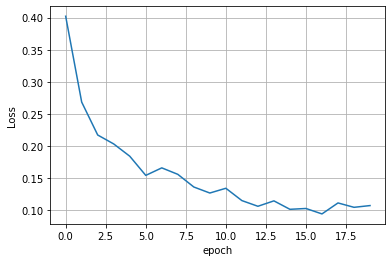

In [ ]:
train_loss = [v.cpu().data for v in training_loss]
fig1,ax1 = plt.subplots(1)
ax1.plot(range(0, num_epochs), train_loss)
ax1.set_ylabel('Loss')
ax1.set_xlabel('epoch')
plt.grid()
plt.savefig('face_mask_train_loss.png')
plt.show()

In [ ]:
for imgs, annotations in data_loader:
        imgs = list(img.to(device) for img in imgs)
        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
        print("1")
        break
print(annotations)

1
[{'boxes': tensor([[ 79., 105., 109., 142.],
        [185., 100., 226., 144.],
        [325.,  90., 360., 141.]], device='cuda:0'), 'labels': tensor([0, 1, 0], device='cuda:0'), 'image_id': tensor([0], device='cuda:0')}, {'boxes': tensor([[321.,  34., 354.,  69.],
        [224.,  38., 261.,  73.],
        [299.,  58., 315.,  81.],
        [143.,  74., 174., 115.],
        [ 74.,  69.,  95.,  99.],
        [191.,  67., 221.,  93.],
        [ 21.,  73.,  44.,  93.],
        [369.,  70., 398.,  99.],
        [ 83.,  56., 111.,  89.]], device='cuda:0'), 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 0], device='cuda:0'), 'image_id': tensor([1], device='cuda:0')}, {'boxes': tensor([[ 68.,  42., 105.,  69.],
        [154.,  47., 178.,  74.],
        [238.,  34., 262.,  69.],
        [333.,  31., 366.,  65.]], device='cuda:0'), 'labels': tensor([1, 1, 1, 2], device='cuda:0'), 'image_id': tensor([2], device='cuda:0')}, {'boxes': tensor([[ 52.,  53.,  73.,  76.],
        [ 72.,  53.,  92.,  75.],


In [ ]:
model.eval()
preds = model(imgs)
preds

[{'boxes': tensor([[185.3863, 100.3204, 225.4949, 143.1251],
          [324.3771,  91.8487, 360.7148, 141.8909]], device='cuda:0',
         grad_fn=<StackBackward0>),
  'labels': tensor([1, 2], device='cuda:0'),
  'scores': tensor([0.9895, 0.2023], device='cuda:0', grad_fn=<IndexBackward0>)},
 {'boxes': tensor([[ 21.1205,  73.2287,  42.4949,  92.7371],
          [319.6374,  34.7034, 352.9703,  69.6600],
          [196.2088,  67.1805, 214.9770,  93.6866],
          [224.5774,  37.9715, 258.5484,  74.1473],
          [298.1135,  59.5406, 313.0859,  81.3666],
          [144.4719,  75.4388, 171.5397, 113.3862],
          [369.6121,  71.8791, 390.9464,  95.6913],
          [369.7517,  71.5465, 391.0050,  95.5395],
          [ 81.1314,  56.3257, 112.7505,  88.9946]], device='cuda:0',
         grad_fn=<StackBackward0>),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1, 2, 2], device='cuda:0'),
  'scores': tensor([0.9945, 0.9928, 0.9869, 0.9857, 0.9802, 0.9770, 0.4422, 0.1783, 0.0740],
         device=

In [14]:
def plot_image(img_tensor, annotation):
    
    fig,ax = plt.subplots(1)
    img = img_tensor.cpu().data

    # Display the image
    ax.imshow(img.permute(1, 2, 0))
    
    for box in annotation["boxes"]:
        xmin, ymin, xmax, ymax = box.cpu().data

        # Create a Rectangle patch
        rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

def plot_image_withColor(img_tensor, annotation, save_path=None):
    
    fig,ax = plt.subplots(1)
    img = img_tensor.cpu().data

    # Display the image
    ax.imshow(img.permute(1, 2, 0))
    
    for (box, label) in zip(annotation["boxes"],annotation["labels"]):
        xmin, ymin, xmax, ymax = box.cpu().data
        
        if(label == 1):
        # Create a Rectangle patch with different colors
        #red: with mask  green: mask_weared_incorrect  blue: without mask
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        elif(label == 2):
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
        else:
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='b',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
    
    if save_path:
      fig.savefig(save_path)
    plt.show()
    

In [ ]:
print(preds[3])
print("------------------------------------")
print(annotations[3])

{'boxes': tensor([[235.5766,  55.7941, 256.7451,  77.1512],
        [ 71.2996,  50.7502,  90.3494,  74.0680],
        [313.1717,  66.5349, 332.4348,  89.0077],
        [ 51.4293,  51.9795,  72.9771,  76.4579],
        [289.1593,  61.0820, 309.0398,  81.0863],
        [154.7597,  58.8636, 176.4531,  82.0873],
        [186.3844,  57.1795, 209.7157,  80.0957],
        [349.8857,  34.4077, 363.1783,  55.4227],
        [124.9029,  58.9362, 145.4947,  74.2149],
        [271.1375,  75.4944, 286.0883,  94.7356],
        [122.6561,  58.1230, 148.0820,  83.0166]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'), 'scores': tensor([0.9965, 0.9963, 0.9950, 0.9946, 0.9945, 0.9942, 0.9897, 0.9521, 0.4100,
        0.3542, 0.1530], device='cuda:0', grad_fn=<IndexBackward0>)}
------------------------------------
{'boxes': tensor([[ 52.,  53.,  73.,  76.],
        [ 72.,  53.,  92.,  75.],
        [112.,  51., 120.,  68.],
        [1

Prediction


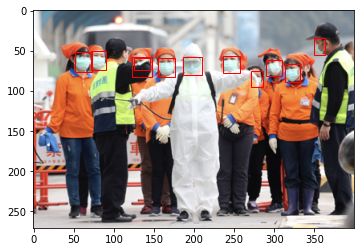

Target


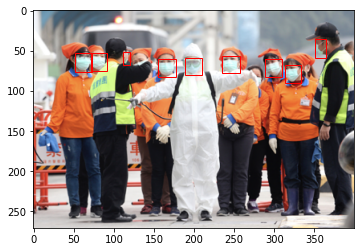

In [ ]:
print("Prediction")
plot_image_withColor(imgs[3], preds[3], 'face_mask_eg1_pred.png')
print("Target")
plot_image_withColor(imgs[3], annotations[3], 'face_mask_eg1_label.png')

Prediction


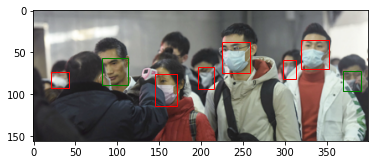

Target


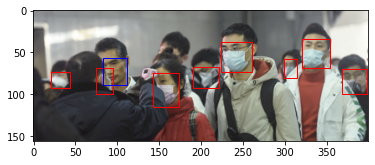

In [ ]:
print("Prediction")
plot_image_withColor(imgs[1], preds[1], 'face_mask_figures/face_mask_eg2_pred.png')
print("Target")
plot_image_withColor(imgs[1], annotations[1], 'face_mask_figures/face_mask_eg2_label.png')

In [ ]:
torch.save(model.state_dict(),'fasterrcnn_resnet50_fpn_20epochs.pt')

In [15]:
model2 = get_model_instance_segmentation(3)
model2.load_state_dict(torch.load('face_mask_detection/fasterrcnn_resnet50_fpn_20epochs.pt'))
model2.eval()
model2.to(device)

in_features: 1024


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [40]:
for i, (imgs, annotations) in enumerate(data_loader):
        imgs = list(img.to(device) for img in imgs)
        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
        if i == 5:
          break
print(annotations)

[{'boxes': tensor([[ 93.,  60., 153., 124.]], device='cuda:0'), 'labels': tensor([1], device='cuda:0'), 'image_id': tensor([20], device='cuda:0')}, {'boxes': tensor([[ 40., 137., 109., 218.],
        [ 54.,  57., 111., 112.],
        [189.,  78., 246., 140.],
        [311.,  48., 358.,  98.],
        [182.,  32., 221.,  60.]], device='cuda:0'), 'labels': tensor([1, 1, 1, 1, 0], device='cuda:0'), 'image_id': tensor([21], device='cuda:0')}, {'boxes': tensor([[183., 101., 270., 185.]], device='cuda:0'), 'labels': tensor([1], device='cuda:0'), 'image_id': tensor([22], device='cuda:0')}, {'boxes': tensor([[188.,  74., 241., 131.]], device='cuda:0'), 'labels': tensor([1], device='cuda:0'), 'image_id': tensor([23], device='cuda:0')}]


In [41]:
pred2 = model2(imgs)
metric = MeanAveragePrecision()
metric.update(pred2, annotations)
from pprint import pprint
pprint(metric.compute())

{'map': tensor(0.3761),
 'map_50': tensor(0.5000),
 'map_75': tensor(0.4257),
 'map_large': tensor(-1.),
 'map_medium': tensor(0.3761),
 'map_per_class': tensor(-1.),
 'map_small': tensor(-1.),
 'mar_1': tensor(0.1929),
 'mar_10': tensor(0.3786),
 'mar_100': tensor(0.3786),
 'mar_100_per_class': tensor(-1.),
 'mar_large': tensor(-1.),
 'mar_medium': tensor(0.3786),
 'mar_small': tensor(-1.)}


Predict with loaded model


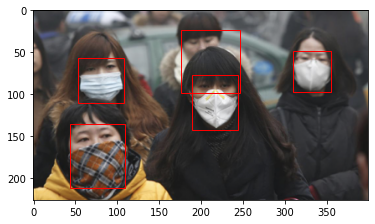

Target


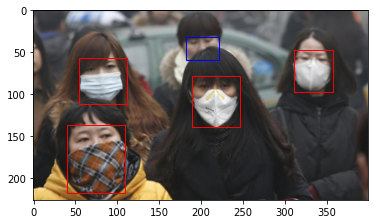

In [43]:
print("Predict with loaded model")
plot_image_withColor(imgs[1], pred2[1], 'face_mask_figures/face_mask_eg6_pred.png')
print("Target")
plot_image_withColor(imgs[1], annotations[1], 'face_mask_figures/face_mask_eg6_label.png')